In [1]:
#necessary packages
import numpy as np
import pandas as pd
import seaborn as sns #a library that used the matplotlib underneath to plot graphs
import matplotlib.pyplot as plt #to plot graphs
from matplotlib import gridspec

In [2]:
data= pd.read_csv("creditcard.csv") #reading dataset

In [3]:
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [4]:
print(data.shape)
print(data.describe()) #describing the data

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier= len(fraud)/float(len(valid))
print(outlier)
print('fraud : {}' .format(len(fraud)))
print("valid : {}" .format(len(valid)))

0.0017304750013189597
fraud : 492
valid : 284315


In [6]:
print("fraud transactions")
fraud.Amount.describe() #balancing data by printing the fradulent transactions amount


fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("valid transactions")
valid.Amount.describe() #balancing data by printing the valid transactions amount

valid transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
corrdata = data.corr() #calculates the relationship between each column in the datasset

In [11]:
fig = plt.figure(figsize = (12,9)) #figure() creates a figure and figsize determines the size of the figure measuring in inches
#heatmap: wo-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours

<Figure size 864x648 with 0 Axes>

<AxesSubplot:>

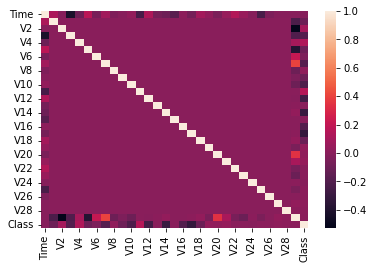

In [12]:
sns.heatmap(corrdata) 

In [13]:
#dividing x and y axis values
X= data.drop(['Class'], axis=1)
Y=data['Class']
print(X.shape)
print(Y.shape)
#numpy arrays with no columns
xData=X.values
yData=Y.values

(284807, 30)
(284807,)


In [14]:
#bifurcating data for training and testing
from sklearn.model_selection import train_test_split

In [15]:
#splitting the data into test and train data
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42) #random_state =42 is to produce the same reult for train and test when using the train_test_split

In [17]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

In [18]:
#building the random forest classifier
rfc=RandomForestClassifier()

In [20]:
rfc.fit(xTrain,yTrain)

RandomForestClassifier()

In [21]:
#predictions
yPred= rfc.predict(xTest)

In [22]:
# necessary imports for evaluating parameters
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [23]:
n_outliers=len(fraud)
n_errors=(yPred!=yTest).sum()
print("model for Ramdon Forest Classifier")

model for Ramdon Forest Classifier


In [25]:
acc=accuracy_score(yTest,yPred)
print("accuracy {}".format(acc))

prec=precision_score(yTest,yPred)
print("precession {}".format(prec))

rec=recall_score(yPred,yTest)
print("recall {}".format(rec))

f1=f1_score(yPred, yTest)
print("f1 {}".format(f1))

accuracy 0.9995962220427653
precession 0.9746835443037974
recall 0.9746835443037974
f1 0.8700564971751412


<function matplotlib.pyplot.show(close=None, block=None)>

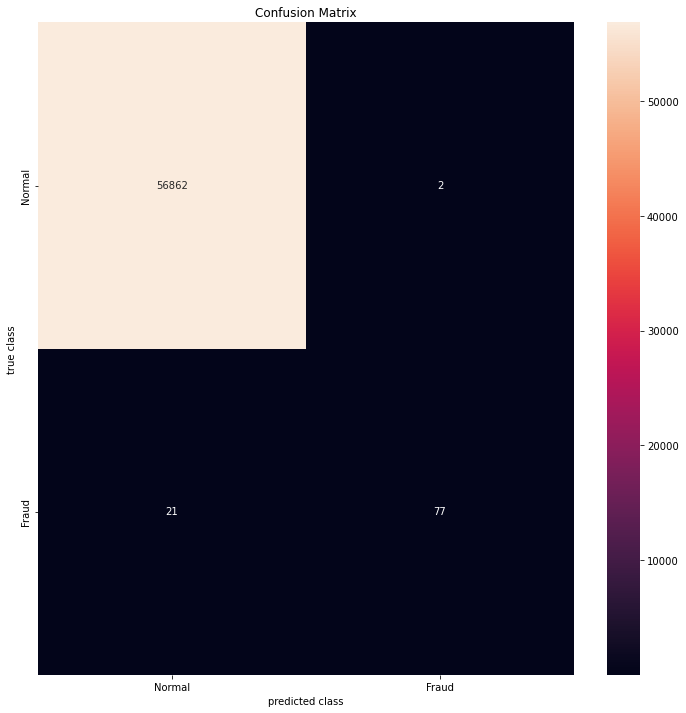

In [26]:
#confusion matrix
LABELS = ['Normal','Fraud']
conf_matrix=confusion_matrix(yTest, yPred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels= LABELS, yticklabels= LABELS, annot= True, fmt= "d")
plt.title("Confusion Matrix")
plt.ylabel("true class")
plt.xlabel("predicted class")
plt.show